<a href="https://colab.research.google.com/github/LucasMontero/COW/blob/master/neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

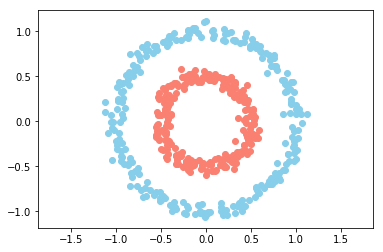

In [4]:
# Dataset creation

n = 500 # Number of points
p = 2 # Number of types of points

X, Y = make_circles(n_samples = n, factor = 0.5, noise = 0.05)

Y = Y[:, np.newaxis]

plt.scatter(X[Y[:, 0] == 0 , 0], X[Y[:, 0] == 0 ,1], c='skyblue')
plt.scatter(X[Y[:, 0] == 1 , 0], X[Y[:, 0] == 1 ,1], c='salmon')
plt.axis('equal')
plt.show()

In [0]:
# Network layer class

class neural_layer():
  def __init__(self, n_connections, n_neurons, activation_function):
    
    self.activation_function = activation_function
    
    self.bias = np.random.rand(1, n_neurons)          * 2 -1
    self.weight = np.random.rand(n_connections, n_neurons) * 2 -1

In [0]:
# Activation functions

sigmoid = (lambda x: 1/(1 + np.e ** (-x)),
           lambda x: x * (1-x))

relu = lambda x : np.maximum(0, x)

# representation
# _x = np.linspace(-5, 5, 100)
# plt.plot(_x, sigmoid[1](_x))

In [0]:
def create_neural_network(topology, activation_function):
  
  neural_network = []
  
  for i, layer in enumerate(topology[:-1]):
    neural_network.append(neural_layer(topology[i], topology[i+1], activation_function))
    
  return neural_network

In [9]:
topology = [p, 4, 8, 1]

neural_network = create_neural_network(topology, sigmoid)

cost = (lambda predicted_Y, real_Y: np.mean((predicted_Y - real_Y) ** 2),
        lambda predicted_Y, real_Y: (predicted_Y - real_Y))

def train(neural_network, X, Y, cost, learning_rate = 0.5, train=True):
  
  output = [(None, X)]
  
  # Forward pass
  for i, layer in enumerate(neural_network):
    weighted_sum = output[-1][1] @ neural_network[i].weight + neural_network[i].bias
    activation = neural_network[i].activation_function[0](weighted_sum)
    
    output.append((weighted_sum, activation))
      
  if train:
    
    # Backward pass 
    deltas = []
    
    for i in reversed(range(0, len(neural_network))):
      weighted_sum = output[i+1][0]
      activation = output[i+1][1]
      
      if i == len(neural_network) -1:
        # Calculate delta of last layer
        deltas.insert(0, cost[1](activation, Y) * neural_network[i].activation_function[1](activation))
      else:
        # Calculate previous layer delta
        deltas.insert(0, deltas[0] @ _X.T * neural_network[i].activation_function[1](activation))
        
      _X = neural_network[i].weight
                      
      # Gradient descent

      neural_network[i].bias = neural_network[i].bias - np.mean(deltas[0], axis=0, keepdims=True) * learning_rate 
      neural_network[i].weight = neural_network[i].weight - output[i][1].T @ deltas[0] * learning_rate 

  return output[-1][1]               
                      
train(neural_network, X, Y, cost, 0.5)
print('')

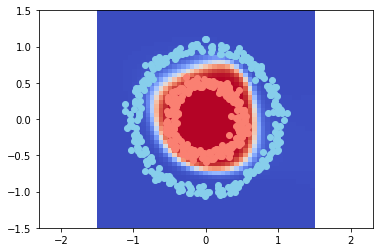

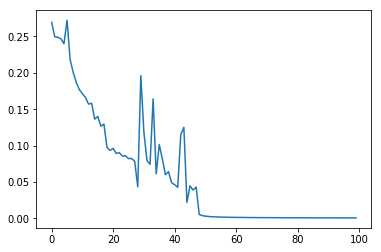

In [16]:
# Tests and train

import time
from IPython.display import clear_output

neural_n = create_neural_network(topology, sigmoid)

loss = []

for i in range(2500):
    
  pY = train(neural_n, X, Y, cost, learning_rate=0.05)
  
  if i % 25 == 0:
    
    print(pY)
  
    loss.append(cost[0](pY, Y))
  
    res = 50

    _x0 = np.linspace(-1.5, 1.5, res)
    _x1 = np.linspace(-1.5, 1.5, res)

    _Y = np.zeros((res, res))

    for i0, x0 in enumerate(_x0):
      for i1, x1 in enumerate(_x1):
        _Y[i0, i1] = train(neural_n, np.array([[x0, x1]]), Y, cost, train=False)[0][0]    

    plt.pcolormesh(_x0, _x1, _Y, cmap="coolwarm")
    plt.axis("equal")

    plt.scatter(X[Y[:,0] == 0, 0], X[Y[:,0] == 0, 1], c="skyblue")
    plt.scatter(X[Y[:,0] == 1, 0], X[Y[:,0] == 1, 1], c="salmon")

    clear_output(wait=True)
    plt.show()
    plt.plot(range(len(loss)), loss)
    plt.show()
    time.sleep(0.5)  